In [1]:
import uproot
import pandas as pd
import awkward as ak
import numpy as np 
import h5py
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import os

In [2]:
treename= 'events' 

filename = {} 
upfile={}
params={}

filename['Zmuons']= 'data/drellyan_complete_merged.root'
upfile['Zmuons']= uproot.open(f'{filename["Zmuons"]}:{treename}')
params['Zmuons']= upfile['Zmuons'].arrays()

print(params['Zmuons'][0].fields)


['numberjet', 'njet_e', 'jet_e', 'njet_pt', 'jet_pt', 'njet_eta', 'jet_eta', 'njet_phi', 'jet_phi', 'njet_ch', 'jet_ch', 'njet_mass', 'jet_mass', 'njet_btag', 'jet_btag', 'njet_hflav', 'jet_hflav', 'njet_corrpt', 'jet_corrpt', 'njet_corrptUp', 'jet_corrptUp', 'njet_corrptDown', 'jet_corrptDown', 'njet_corrptSmearUp', 'jet_corrptSmearUp', 'njet_corrptSmearDown', 'jet_corrptSmearDown', 'njet_corrmass', 'jet_corrmass', 'njet_corre', 'jet_corre', 'njet_corrpx', 'jet_corrpx', 'njet_corrpy', 'jet_corrpy', 'njet_corrpz', 'jet_corrpz', 'btag_Weight', 'btag_WeightUp', 'btag_WeightDn', 'met_e', 'met_pt', 'met_px', 'met_py', 'met_phi', 'met_significance', 'met_rawpt', 'met_rawphi', 'met_rawe', 'numGenPart', 'nGenPart_pt', 'GenPart_pt', 'nGenPart_eta', 'GenPart_eta', 'nGenPart_mass', 'GenPart_mass', 'nGenPart_pdgId', 'GenPart_pdgId', 'nGenPart_phi', 'GenPart_phi', 'nGenPart_px', 'GenPart_px', 'nGenPart_py', 'GenPart_py', 'nGenPart_pz', 'GenPart_pz', 'nGenPart_status', 'GenPart_status', 'nGenPart_m

In [3]:
numbermuon=params['Zmuons']['numbermuon']
muon_e=params['Zmuons']['muon_e']
muon_ch=params['Zmuons']['muon_ch']
muon_pt=params['Zmuons']['muon_pt']
muon_eta=params['Zmuons']['muon_eta']
muon_phi=params['Zmuons']['muon_phi']
numberjet=params['Zmuons']['numberjet']
jet_e=params['Zmuons']['jet_e']
jet_pt=params['Zmuons']['jet_pt']
jet_eta=params['Zmuons']['jet_eta']
jet_phi=params['Zmuons']['jet_phi']
jet_ch=params['Zmuons']['jet_ch']
jet_btag=params['Zmuons']['jet_btag']
met_e=params['Zmuons']['met_e']
met_phi=params['Zmuons']['met_phi']
met_pt=params['Zmuons']['met_pt']

In [4]:
len(params['Zmuons'])

44397

In [5]:
numbermuon = np.array(numbermuon)
index_dimuon = np.where(numbermuon >= 2)[0]
index_dimuon_dch = [i for i in index_dimuon if muon_ch[i, 0] != muon_ch[i, 1]]
index_dimuon_ech = [i for i in index_dimuon if muon_ch[i, 0] == muon_ch[i, 1]]
    

In [6]:
numberjet = np.array(numberjet)
index_dijet = np.where(numberjet >= 1)[0]
#index_dijet_dch = [i for i in index_dijet if jet_ch[i, 0] != jet_ch[i, 1]]

In [7]:
print(len(index_dimuon), len(index_dimuon_dch),len(index_dimuon_ech))

30267 25499 4768


In [8]:
print(len(index_dijet))

36294


In [9]:
# m^2=2pt1*2pt2*(cosh(eta1-eta2)-cos(phi1-phi2))

#invariant mass

dm_imass=[]

for i in index_dimuon_dch:
    imass=(2*muon_pt[i][0]*muon_pt[i][1]*(np.cosh(muon_eta[i][0]-muon_eta[i][1])-np.cos(muon_phi[i][0]-muon_phi[i][1])))**(1/2)
    dm_imass.append(imass)
    

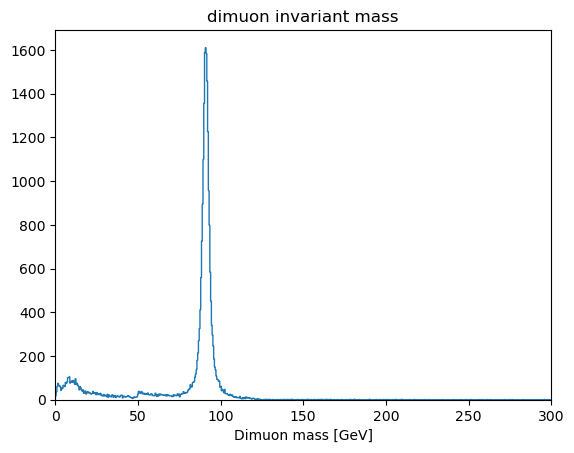

"\n\nplt.figure(figsize=(5, 4),dpi=100)\nplt.xlabel(VARS[0])\nbins = np.linspace(0, 4000, 25)\ndm_imass.plot.hist(bins=bins, alpha=1, label='muon_e',histtype='step')\n#df['VV'][VARS[1]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')\nplt.legend(loc='upper right')\nplt.xlim(0,5000)\n"

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline



plt.hist(dm_imass, bins='auto', histtype='step', fill=False)  # arguments are passed to np.histogram
plt.title("dimuon invariant mass")
plt.xlim([0,300])
plt.xlabel('Dimuon mass [GeV]')
plt.show()

'''

plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(0, 4000, 25)
dm_imass.plot.hist(bins=bins, alpha=1, label='muon_e',histtype='step')
#df['VV'][VARS[1]].plot.hist(bins=bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,5000)
'''

In [11]:
muonspjets=np.intersect1d(index_dimuon, index_dijet)

In [50]:
len(muonspjets)

27699

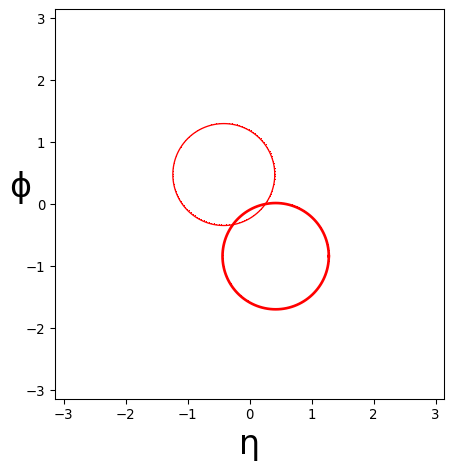

In [33]:
c=0.1
cm=0.25
a_1=0.4
#my_dpi=96
my_dpi=96
angle = np.linspace(0,2*np.pi,125)
#fig, ax = plt.subplots(figsize=(244/my_dpi, 244/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
ejemplo = [0]

for i in ejemplo:  

    muonfill = muon_ch[i][0] == 1
    muonfill2 = muon_ch[i][1] == 1
  
    radius = cm*np.log(muon_pt[i][0])  #muon1
    radius_1 = cm*np.log(muon_pt[i][1]) #muon2 
    radius_2 = c*np.log(met_pt[i])   #met
    radius_3 = c*np.log(jet_pt[i][0])   #jet    

    x = radius * np.cos( angle )+ muon_eta[i][0]*a_1   #muon1 
    y = radius * np.sin( angle ) + muon_phi[i][0]*a_1  #muon1 
 
    x_1 = radius_1 * np.cos( angle )+ muon_eta[i][1]*a_1   #muon2
    y_1 = radius_1 * np.sin( angle ) + muon_phi[i][1]*a_1   #muon2 

    x_2 = radius_2 * np.cos( angle )+ 0                 #met 
    y_2 = radius_2 * np.sin( angle ) + met_phi[i]*a_1   #met
    
    x_3 = radius_3 * np.cos( angle )+ jet_eta[i][0]*a_1   #jet1 
    y_3 = radius_3 * np.sin( angle ) + jet_phi[i][0]*a_1  #jet1
 
    ax.clear()
   # jet2
    if len(jet_pt[i]) > 1:
        radius_4 = c*np.log(jet_pt[i][1])
        x_4 = radius_4 * np.cos( angle )+ jet_eta[i][1]*a_1   #jet2 
        y_4 = radius_4 * np.sin( angle ) + jet_phi[i][1]*a_1  #jet2
        #plt.plot(x_4, y_4,'-,b')

    #jet 3
    if len(jet_pt[i]) > 2:
        radius_5 = c*np.log(jet_pt[i][2])
        x_5 = radius_5 * np.cos( angle )+ jet_eta[i][2]*a_1   #jet3 
        y_5 = radius_5 * np.sin( angle ) + jet_phi[i][2]*a_1  #jet3
        #plt.plot(x_5, y_5,'-,b')

    #jet 4
    if len(jet_pt[i]) > 3:
        radius_6 = c*np.log(jet_pt[i][3])
        x_6 = radius_6 * np.cos( angle )+ jet_eta[i][3]*a_1   #jet4 
        y_6 = radius_6 * np.sin( angle ) + jet_phi[i][3]*a_1  #jet4
        #plt.plot(x_6, y_6,'-,b')

        
    plt.plot(x,y,'-,r', lw=muonfill+1)
    plt.plot(x_1,y_1,'-,r',lw=muonfill2+1)
    #plt.plot(x_2, y_2,'-,k')
    #plt.plot(x_3, y_3,'-,b')

    plt.xlim([-np.pi,np.pi])
    plt.ylim([-np.pi,np.pi])
    #plt.axis('off')
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('η', fontsize=25)
    plt.ylabel('ϕ',fontsize=25, rotation=0)
    plt.tight_layout()
    #plt.savefig("4jets_wcharge_FULL/drellyan/dy_{}".format(i))
    
#plt.close(fig)

In [52]:
#fig, ax = plt.subplots(figsize=(244/my_dpi, 244/my_dpi), dpi=my_dpi)
'''
figure, axes = plt.subplots(figsize=(244/my_dpi, 244/my_dpi), dpi=my_dpi)
for i in muonspjets[:11000]:   
    muonfill = muon_ch[i][0] == 1
    muonfill2 = muon_ch[i][1] == 1
    
    radius = cm*np.log(muon_pt[i][0])  #muon1
    radius_1 = cm*np.log(muon_pt[i][1]) #muon2 
    radius_2 = c*np.log(met_pt[i])   #met
    radius_3 = c*np.log(jet_pt[i][0])   #jet    


    muon1 = plt.Circle((muon_eta[i][0]*a_1, muon_phi[i][0]*a_1), radius ,color='r',alpha=0.4, fill=muonfill)
    muon2 = plt.Circle((muon_eta[i][1]*a_1, muon_phi[i][1]*a_1), radius_1 ,color='r',alpha=0.4, fill=muonfill2)
    jet = plt.Circle((jet_eta[i][0]*a_1, jet_phi[i][0]*a_1), radius_3, color='b', fill=0)
    met = plt.Circle((0, met_phi[i]*a_1), radius_2, color='k', fill=0)
    
    axes.clear()
    axes.set_aspect('equal',adjustable='box')
    axes.add_artist(muon1)
    axes.add_artist(muon2)
    axes.add_artist(jet)
    axes.add_artist(met)
    axes.set_xlim([-3,3])
    axes.set_ylim([-np.pi,np.pi])
    axes.axis('off')
    plt.tight_layout()
    plt.savefig("compleximages/drellyan/dy_{}.png".format(i))
    
plt.close(figure)
'''

'\nfigure, axes = plt.subplots(figsize=(244/my_dpi, 244/my_dpi), dpi=my_dpi)\nfor i in muonspjets[:11000]:   \n    muonfill = muon_ch[i][0] == 1\n    muonfill2 = muon_ch[i][1] == 1\n    \n    radius = cm*np.log(muon_pt[i][0])  #muon1\n    radius_1 = cm*np.log(muon_pt[i][1]) #muon2 \n    radius_2 = c*np.log(met_pt[i])   #met\n    radius_3 = c*np.log(jet_pt[i][0])   #jet    \n\n\n    muon1 = plt.Circle((muon_eta[i][0]*a_1, muon_phi[i][0]*a_1), radius ,color=\'r\',alpha=0.4, fill=muonfill)\n    muon2 = plt.Circle((muon_eta[i][1]*a_1, muon_phi[i][1]*a_1), radius_1 ,color=\'r\',alpha=0.4, fill=muonfill2)\n    jet = plt.Circle((jet_eta[i][0]*a_1, jet_phi[i][0]*a_1), radius_3, color=\'b\', fill=0)\n    met = plt.Circle((0, met_phi[i]*a_1), radius_2, color=\'k\', fill=0)\n    \n    axes.clear()\n    axes.set_aspect(\'equal\',adjustable=\'box\')\n    axes.add_artist(muon1)\n    axes.add_artist(muon2)\n    axes.add_artist(jet)\n    axes.add_artist(met)\n    axes.set_xlim([-3,3])\n    axes.set_yl

In [12]:
muonspjets

array([    0,     2,     3, ..., 44393, 44394, 44396])